In [2]:
import time
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import pi, sqrt
from numpy import arccos, arctan2
from qiskit.visualization.bloch import Bloch
from qiskit import transpile, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector
from qiskit.circuit.library import RYGate, XGate

In [3]:
radius = []
k_list = []
size_list = []

def project(img, n):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    r = round(np.sqrt(2**(2*n)/(8 * np.pi)),4)
    radius.append(r)
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r**2 / (x**2 + y**2 + 4*r**2), 4)
    P = np.array([k * x, k * y, (1-2*k)*r ])
    size = np.sqrt(P[0]**2+P[1]**2+P[2]**2)
    resize = P*(1/size)
    k = k * (1/size)
    size_list.append(size)
    k_list.append(k)
    return resize

In [ ]:
color = np.array([[0,0,0],[0,0,255],[0,255,0],[0,255,255],
                  [255,0,0],[255,0,255],[255,255,0],[255,255,255]])

C:\Users\HCI\AppData\Local\Temp\ipykernel_1248\721530673.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(color[0], color[1], color[2], c=color, label=name)
C:\Users\HCI\AppData\Local\Temp\ipykernel_1248\721530673.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(color[0], color[1], color[2], c=color, label=name)
C:\Users\HCI\AppData\Local\Temp\ipykernel_1248\721530673.py:37: UserWarning: *c* arg

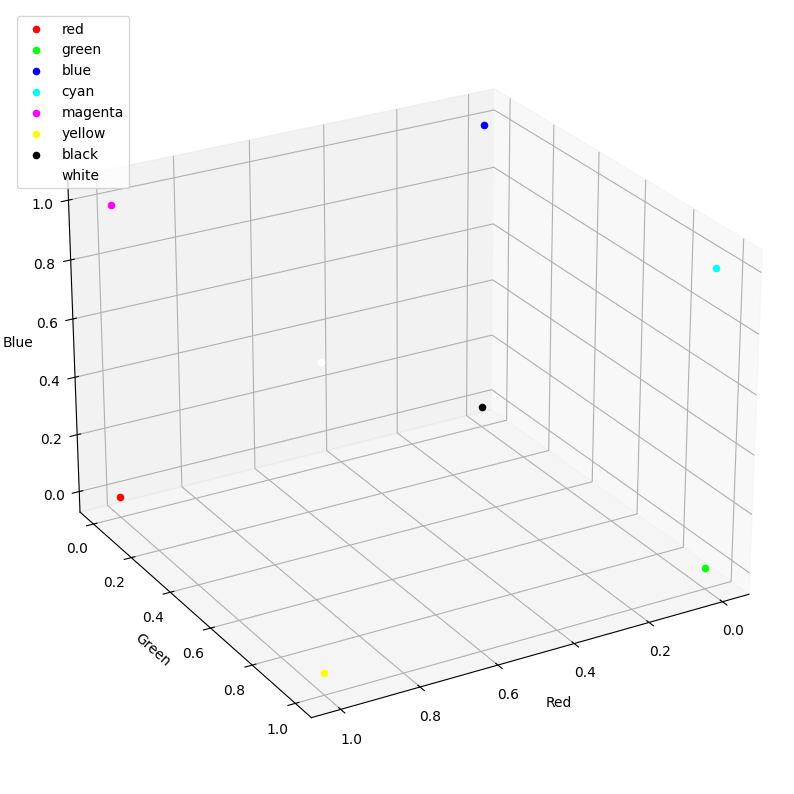

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# RGB 색상 목록
rgb_colors = {
    'red': (1, 0, 0),
    'green': (0, 1, 0),
    'blue': (0, 0, 1),
}

# CMY 색상 목록
cmy_colors = {
    'cyan': (0, 1, 1),
    'magenta': (1, 0, 1),
    'yellow': (1, 1, 0),
}

bw_colors = {
    'black': (0,0,0),
    'white':(1,1,1)
}
# 3D 그래프 생성
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')

# RGB 색상 점 찍기
for name, color in rgb_colors.items():
    ax.scatter(color[0], color[1], color[2], c=color, label=name)

# CMY 색상 점 찍기

for name, color in cmy_colors.items():
    ax.scatter(color[0], color[1], color[2], c=color, label=name)

for name, color in bw_colors.items():
    ax.scatter(color[0], color[1], color[2], c=color, label=name)

# 축 레이블 설정
ax.view_init(25,60)
ax.set_xlabel('Red', fontsize=10)
ax.set_ylabel('Green', fontsize=10)
ax.set_zlabel('Blue', fontsize=10)

# 범례 표시
ax.legend(loc = 'upper left', fontsize=10)

plt.show()


In [17]:
color_main = [[0,0,0],[0,0,255],[0,255,0],[0,255,255],
                  [255,0,0],[255,0,255],[255,255,0],[255,255,255]] # Black, Blue, Green, Cyan, Red, Magenta, Yellow, White

In [3]:
color_proj = [[0,0,1],  [np.cos(4*pi/3),np.sin(4*pi/3),0],  [np.cos(2*pi/3),np.sin(2*pi/3),0],  [np.cos(pi), np.sin(pi),0],
              [1,0,0],  [np.cos(5*pi/3),np.sin(5*pi/3),0],  [np.cos(pi/3),np.sin(pi/3),0],  [0,0,-1]]

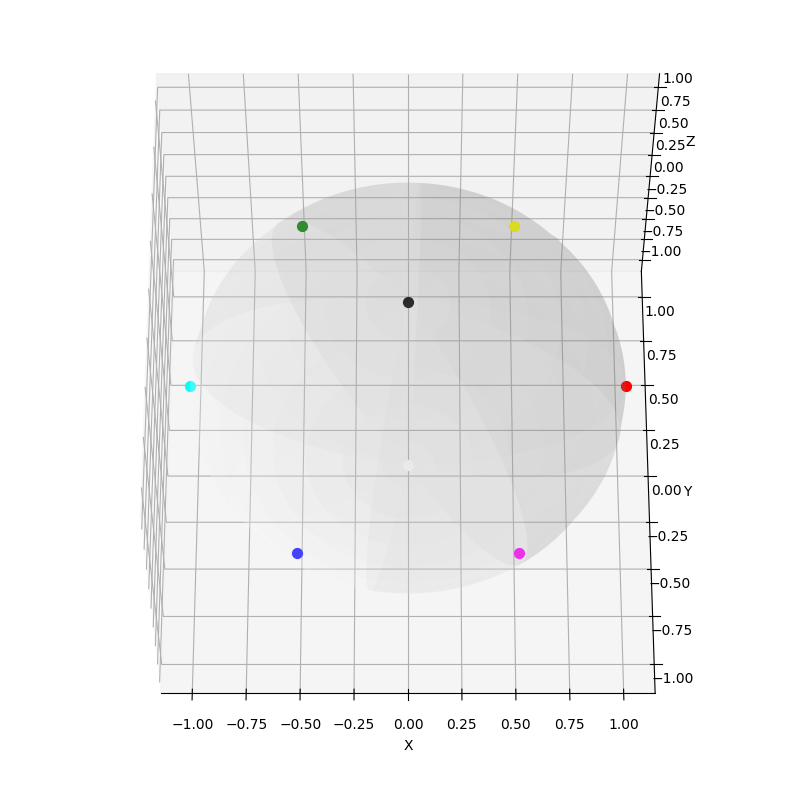

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프를 만듭니다.
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')

# 구를 생성합니다. 크기는 1입니다.
u = np.linspace(0, 2 * np.pi, 5000)
v = np.linspace(0, np.pi, 10000)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# 구를 그립니다.
ax.plot_surface(x, y, z, color='white', alpha=0.15, rstride=600, cstride=600)


ax.scatter(color_proj[0][0],color_proj[0][1],color_proj[0][2], color = 'black',s=50)
ax.scatter(color_proj[1][0],color_proj[1][1],color_proj[1][2], color = 'blue',s=50)
ax.scatter(color_proj[2][0],color_proj[2][1],color_proj[2][2], color = 'green',s=50)
ax.scatter(color_proj[3][0],color_proj[3][1],color_proj[3][2], color = 'cyan',s=50)
ax.scatter(color_proj[4][0],color_proj[4][1],color_proj[4][2], color = 'red',s=50)
ax.scatter(color_proj[5][0],color_proj[5][1],color_proj[5][2], color = 'magenta',s=50)
ax.scatter(color_proj[6][0],color_proj[6][1],color_proj[6][2], color = 'yellow',s=50)
ax.scatter(color_proj[7][0],color_proj[7][1],color_proj[7][2], color = 'white',s=50)


# 축 레이블을 추가합니다.
ax.view_init(60,270)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [5]:
color_proj

[[0, 0, 1],
 [-0.5000000000000004, -0.8660254037844385, 0],
 [-0.4999999999999998, 0.8660254037844387, 0],
 [-1.0, 1.2246467991473532e-16, 0],
 [1, 0, 0],
 [0.5000000000000001, -0.8660254037844386, 0],
 [0.5000000000000001, 0.8660254037844386, 0],
 [0, 0, -1]]

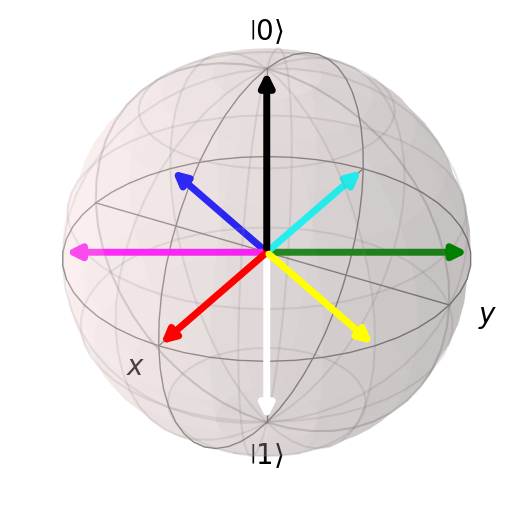

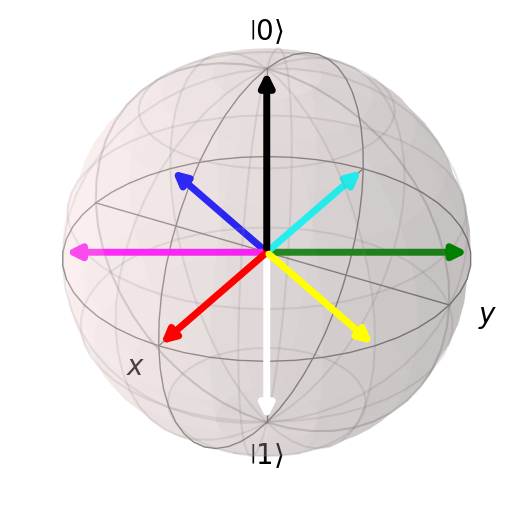

In [6]:
from qiskit.visualization.bloch import Bloch

_bloch = Bloch()
_bloch.vector_color = ['black','blue','green','cyan','red', 'magenta','yellow','white']
_bloch.add_vectors(color_proj)
_bloch.render()
_bloch.fig

In [144]:
for color in color_proj:
    phi = round(np.arctan2(color[1],color[0]),4)
    print(color)
    print(phi)

[0, 0, 1]
0.0
[-0.5000000000000004, -0.8660254037844385, 0]
-2.0944
[-0.4999999999999998, 0.8660254037844387, 0]
2.0944
[-1.0, 1.2246467991473532e-16, 0]
3.1416
[1, 0, 0]
0.0
[0.5000000000000001, -0.8660254037844386, 0]
-1.0472
[0.5000000000000001, 0.8660254037844386, 0]
1.0472
[0, 0, -1]
0.0


In [139]:
thetas = []
phis = []
for color in color_proj:
    theta = np.arccos(color[2]) / 2
    phi = round(np.arctan2(color[1],color[0]),4)

    if phi <0:
        phi = round((6.283-abs(phi))/4,4)
        phis.append(phi)
    elif color[0] == 0 and color[1] ==0:
        phi=0
        phis.append(phi)
    else:
        phi = round(phi/4,4)
        phis.append(phi)
    thetas.append(theta)

In [227]:
print("thetas =", thetas)
print("phis = ",phis)

thetas = [0.0, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 1.5707963267948966]
phis =  [0, 1.0472, 0.5236, 0.7854, 0.0, 1.309, 0.2618, 0]


In [275]:
O = QuantumRegister(3, 'o_reg')
c = QuantumRegister(1,'c_reg')
p = QuantumRegister(1, 'p_reg')
cr = ClassicalRegister(O.size+c.size+p.size, "cl_reg")

qc_image = QuantumCircuit(c,O,p, cr)

qc_image.id(c)
qc_image.h(O)
qc_image.h(p)


controls_ = []
for i, _ in enumerate(O):
    controls_.extend([O[i]])
for i, _ in enumerate(p):
    controls_.extend([p[i]]) 

for i, (phi, theta) in enumerate(zip(phis, thetas)):
    qubit_index_bin = "{0:b}".format(i).zfill(3)
    
    for k, qub_ind in enumerate(qubit_index_bin):
        if int(qub_ind):
            qc_image.x(O[k])
            
    qc_image.barrier()
    
    for coord_or_intns in (0,1):
        if not coord_or_intns:  # p = 1, theta
            qc_image.mcry(theta=2*theta,
                          q_controls=controls_,
                          q_target=c[0])
            qc_image.barrier()
        else:
            qc_image.x(p) # p = 0, phi
            qc_image.barrier()
            qc_image.mcry(theta=2*phi,
                          q_controls=controls_,
                          q_target=c[0])
            if i!=len(thetas) - 1:
                qc_image.x(p)
                qc_image.barrier()
       
    qc_image.barrier()
    
    if  i!=len(thetas) - 1:
        for k, qub_ind in enumerate(qubit_index_bin):
            if int(qub_ind):
                qc_image.x(O[k])
           
qc_image.x(O)
qc_image.x(p)
qc_image.barrier()
qc_image.measure(list(reversed(range(qc_image.num_qubits))), list(range(cr.size)))

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc_image, aer_sim)
qobj = assemble(t_qc, shots=200000)
job_oqim = aer_sim.run(qobj)
result_oqim = job_oqim.result()
counts_oqim = result_oqim.get_counts()

pixel_theta_recon = []
pixel_phi_recon = []

pixel_theta = []
pixel_phi = []

for i in range(0, 8):
    for item in counts_oqim.items():
        key = item[0]
        amount = item[1]
        state = key[0]
        decision = int(key[-1])
        bin_coord = key[1:-1]
        int_coord = int(bin_coord, 2)
        if int_coord == i and decision == 1:
            pixel_theta.append((state,bin_coord, amount))
        elif int_coord == i and decision == 0:
            pixel_phi.append((state,bin_coord, amount))

pixel_phi.append(('1','000',0))
pixel_phi.append(('1','011',0))
pixel_phi.append(('1','111',0))
pixel_theta.append(('0','000',0))
pixel_theta.append(('1','111',0))
# ======================== phi ====================================
phi_result_dict = {}
for state in pixel_phi:
    key = state[1]
    value = state[2] 
    if key in phi_result_dict:
        phi_result_dict[key] += value  
    else:
        phi_result_dict[key] = value  

phi_result_list = [(key, value) for key, value in phi_result_dict.items()]
#print(phi_result_list)

phi_state_0 = []
for state, phi, amount in pixel_phi:
    if not int(state):
        phi_state_0.append((phi, amount))

for i in range(0, 8):
    try:
        phi = np.arccos((phi_state_0[i][1]/phi_result_list[i][1])**(1/2))
        pixel_phi_recon.append(phi *4)
    except ZeroDivisionError:
        print("ZeroDivisionError")


# ======================== theta ====================================
        
theta_result_dict = {}
for state in pixel_theta:
    key = state[1]
    value = state[2] 
    if key in theta_result_dict:
        theta_result_dict[key] += value  
    else:
        theta_result_dict[key] = value  

theta_result_list = [(key, value) for key, value in theta_result_dict.items()]

theta_state_0 = []

for state, theta, amount in pixel_theta:
    if not int(state):
        theta_state_0.append((theta, amount))
theta_state_0.sort()
for i in range(0, 8):
    try:
        theta = np.arccos((theta_state_0[i][1]/theta_result_list[i][1])**(1/2))
        pixel_theta_recon.append(theta*2)
    except ZeroDivisionError:
        print("ZeroDivisionError")




for i in range(len(pixel_phi_recon)):
    print(f"{i} th pixel phi, theta angle",pixel_phi_recon[i] * 180 / np.pi, pixel_theta_recon[i] * 180 / np.pi)

recon_pixel = []
for i in range(8):
    x = np.cos(pixel_phi_recon[i]) * np.sin(pixel_theta_recon[i])
    y = np.sin(pixel_phi_recon[i]) * np.sin(pixel_theta_recon[i])
    z = np.cos(pixel_theta_recon[i])
    recon_pixel.append(np.array([x,y,z]))
print(recon_pixel)

C:\Users\HCI\AppData\Local\Temp\ipykernel_1248\2909311248.py:59: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_oqim = aer_sim.run(qobj)


0 th pixel phi, theta angle 0.0 180.0
1 th pixel phi, theta angle 59.67738082259873 90.48388388679858
2 th pixel phi, theta angle 299.04678220781926 90.07330343213646
3 th pixel phi, theta angle 0.0 90.45001860363377
4 th pixel phi, theta angle 179.32728332464865 90.32386131738815
5 th pixel phi, theta angle 118.76307251939832 88.96622164397307
6 th pixel phi, theta angle 238.86219778258268 90.06872746091935
7 th pixel phi, theta angle 0.0 0.0
[array([ 1.2246468e-16,  0.0000000e+00, -1.0000000e+00]), array([ 0.50485043,  0.86316552, -0.00844527]), array([ 0.48552319, -0.87422285, -0.00127939]), array([ 0.99996916,  0.        , -0.00785423]), array([-0.9999151 ,  0.01174066, -0.00565242]), array([-0.48111047,  0.87647431,  0.01804186]), array([-0.51709779, -0.85592549, -0.00119952]), array([0., 0., 1.])]


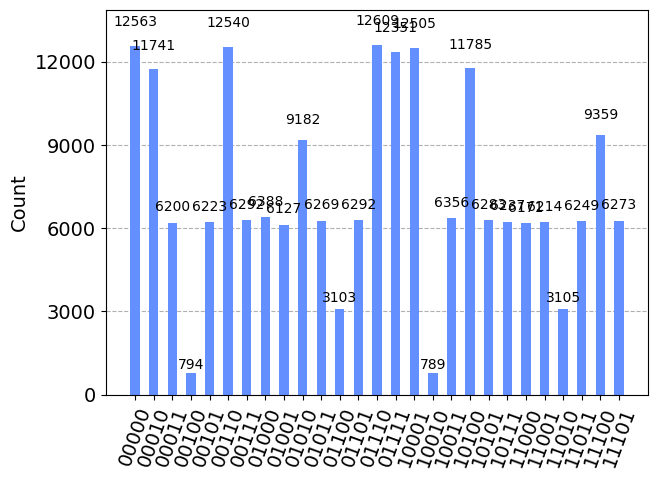

In [247]:
plot_histogram(counts_oqim)

In [215]:
print(thetas,phis)

[0.0, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 1.5707963267948966] [0, 1.0472, 0.5236, 0.7854, 0.0, 1.309, 0.2618, 0]


In [246]:
print(pixel_theta_recon, pixel_phi_recon)

[1.5791930668070437, 1.5795571906963062, 1.5645592801203354, 1.5927471676878717, 1.5548325987732168, 1.5655238946344123, 0.2617557218791453, 3.141592653589793] [0.0, 1.0145882789510159, 5.2673445781685295, 0.0, 3.107034042423775, 2.10687171160145, 4.1934261972284315, 0.0]


In [255]:
recon_rgb = []
for i in range(len(recon_pixel)):
    recon_rgb.append(recon_pixel[7-i])

print(recon_rgb)

[array([1.000000e+00, 0.000000e+00, 6.123234e-17]), array([0.03228464, 0.05556945, 0.99793273]), array([0.60925325, 0.35236142, 0.71038856]), array([0.50199089, 0.49751612, 0.70744813]), array([0.70913366, 0.        , 0.70507408]), array([0.18117998, 0.68217087, 0.70839023]), array([0.68442986, 0.18814993, 0.70438297]), array([0.69940552, 0.        , 0.71472507])]


[array([0., 0., 1.]), array([-0.51709779, -0.85592549, -0.00119952]), array([-0.48111047,  0.87647431,  0.01804186]), array([-0.9999151 ,  0.01174066, -0.00565242]), array([ 0.99996916,  0.        , -0.00785423]), array([ 0.48552319, -0.87422285, -0.00127939]), array([ 0.50485043,  0.86316552, -0.00844527]), array([ 1.2246468e-16,  0.0000000e+00, -1.0000000e+00])]


Text(0.5, 0, 'Z')

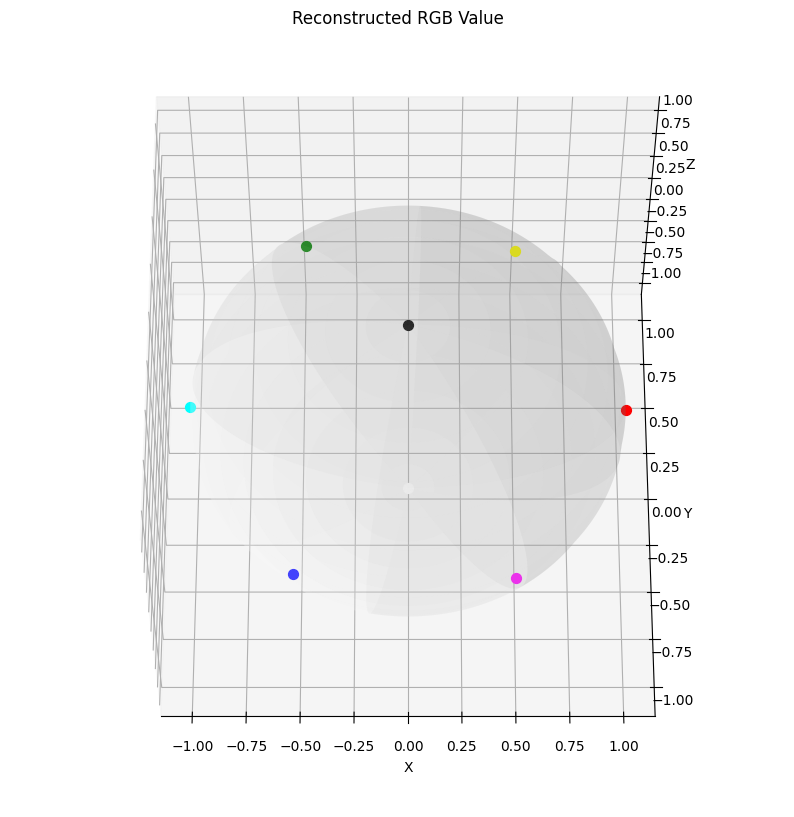

In [278]:
recon_rgb = []
for i in range(len(recon_pixel)):
    recon_rgb.append(recon_pixel[7-i])

print(recon_rgb)

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')

# 구를 생성합니다. 크기는 1입니다.
u = np.linspace(0, 2 * np.pi, 5000)
v = np.linspace(0, np.pi, 10000)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# 구를 그립니다.
ax.plot_surface(x, y, z, color='white', alpha=0.15, rstride=600, cstride=600)


ax.scatter(recon_rgb[0][0],recon_rgb[0][1],recon_rgb[0][2], color = 'black',s=50)
ax.scatter(recon_rgb[1][0],recon_rgb[1][1],recon_rgb[1][2], color = 'blue',s=50)
ax.scatter(recon_rgb[2][0],recon_rgb[2][1],recon_rgb[2][2], color = 'green',s=50)
ax.scatter(recon_rgb[3][0],recon_rgb[3][1],recon_rgb[3][2], color = 'cyan',s=50)
ax.scatter(recon_rgb[4][0],recon_rgb[4][1],recon_rgb[4][2], color = 'red',s=50)
ax.scatter(recon_rgb[5][0],recon_rgb[5][1],recon_rgb[5][2], color = 'magenta',s=50)
ax.scatter(recon_rgb[6][0],recon_rgb[6][1],recon_rgb[6][2], color = 'yellow',s=50)
ax.scatter(recon_rgb[7][0],recon_rgb[7][1],recon_rgb[7][2], color = 'white',s=50)

ax.set_title("Reconstructed RGB Value")
# 축 레이블을 추가합니다.
ax.view_init(60,270)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
color_spec = ['black',
'blue',
'green',
'cyan',
'red',
'magenta',
'yellow',
'white']

In [281]:
color_proj

[[0, 0, 1],
 [-0.5000000000000004, -0.8660254037844385, 0],
 [-0.4999999999999998, 0.8660254037844387, 0],
 [-1.0, 1.2246467991473532e-16, 0],
 [1, 0, 0],
 [0.5000000000000001, -0.8660254037844386, 0],
 [0.5000000000000001, 0.8660254037844386, 0],
 [0, 0, -1]]

In [284]:
recon_rgb

[array([0., 0., 1.]),
 array([-0.51709779, -0.85592549, -0.00119952]),
 array([-0.48111047,  0.87647431,  0.01804186]),
 array([-0.9999151 ,  0.01174066, -0.00565242]),
 array([ 0.99996916,  0.        , -0.00785423]),
 array([ 0.48552319, -0.87422285, -0.00127939]),
 array([ 0.50485043,  0.86316552, -0.00844527]),
 array([ 1.2246468e-16,  0.0000000e+00, -1.0000000e+00])]

In [289]:
abs = []
for i in range(len(recon_rgb)):
    x = recon_rgb[i][0]-color_proj[i][0]
    y = recon_rgb[i][1]-color_proj[i][1]
    z = recon_rgb[i][2]-color_proj[i][2]
    diff = x**2+y**2+z**2
    abs.append(diff)
print(abs)
mse = 0
for i in range(len(recon_rgb)):
    mse += abs[i]

mse / len(recon_rgb)
print(round(mse,4))


[0.0, 0.00039578145518017746, 0.0007915026255286826, 0.00016980019878006192, 6.16898107653869e-05, 0.0002784129653921781, 0.00010302812137040016, 1.4997597826618576e-32]
0.0018


C:\Users\HCI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


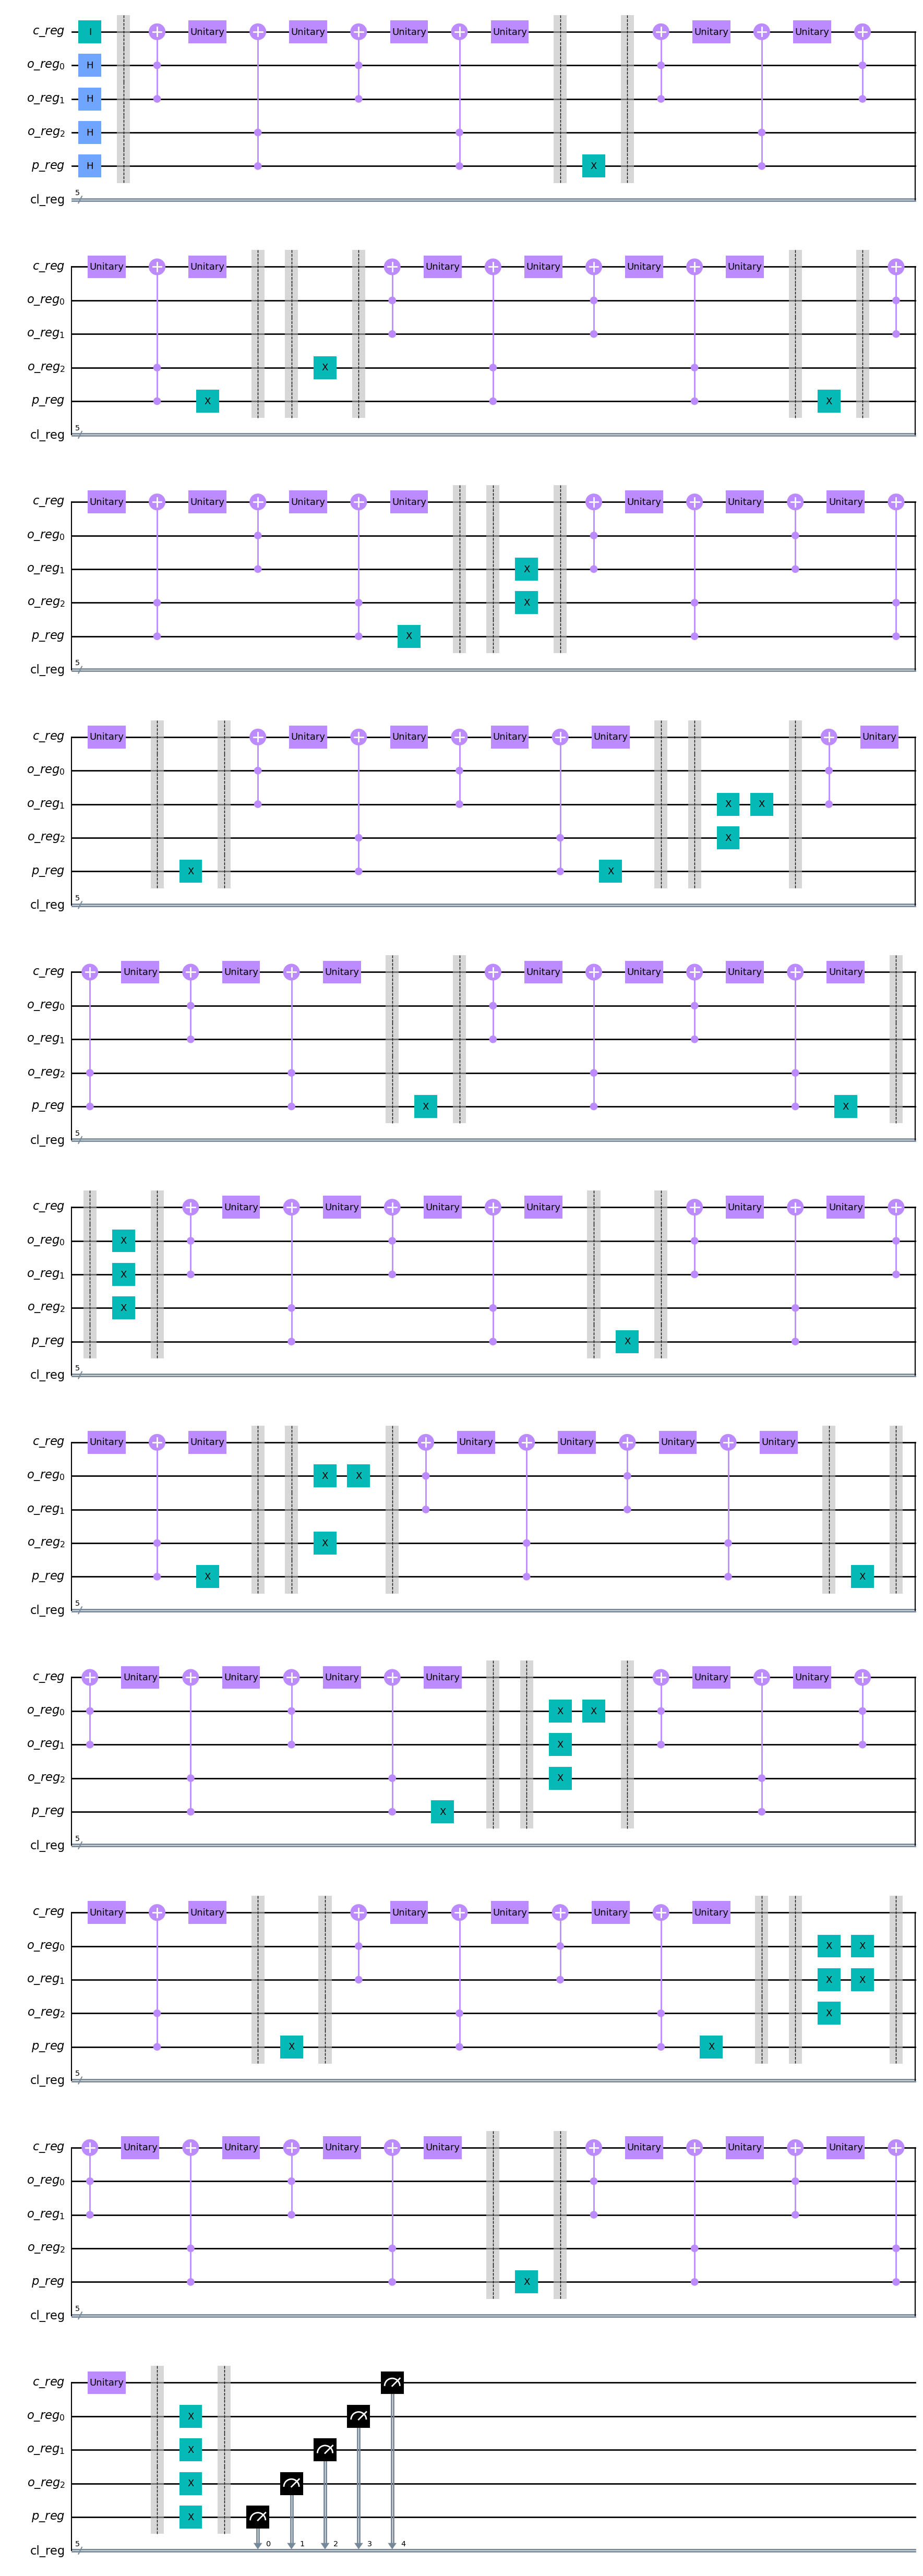

In [279]:
qc_image.draw('mpl')

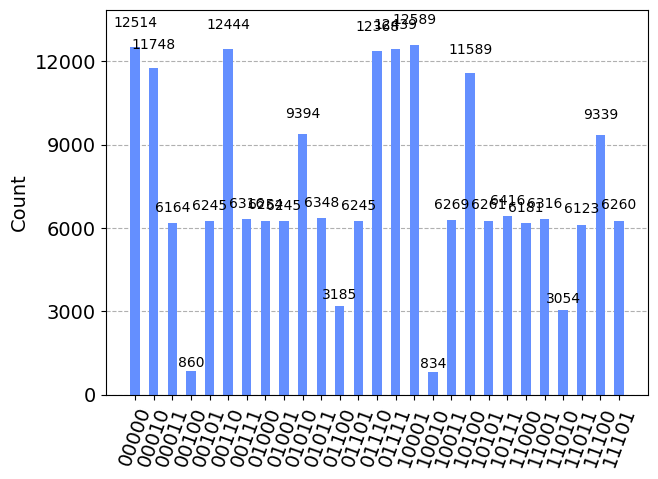

In [280]:
plot_histogram(counts_oqim)

In [ ]:
color_proj = [[0,0,1],  [np.cos(4*pi/3),np.sin(4*pi/3),0],  [np.cos(2*pi/3),np.sin(2*pi/3),0],  [np.cos(pi), np.sin(pi),0],
              [1,0,0],  [np.cos(5*pi/3),np.sin(5*pi/3),0],  [np.cos(pi/3),np.sin(pi/3),0],  [0,0,-1]]

thetas = []
phis = []
for color in color_proj:
    theta = np.arccos(color[2])
    if color[0] == 0 and color[1] ==0:
        phi=0
    else:
        phi = np.arctan(color[1],color[0])
    thetas.append(theta)
    phis.append(phi)

In [29]:
color_list = []
color_index = []
color_angle = []

def color_project(color):
  r,g,b = color[0],color[1],color[2]
  if r==0 and g==0 and b==0:
    color_index.append([0, 0, 0])
    angle = [0, 0]
    P = np.array([0,0,1])
    color_list.append([P])
    color_angle.append([angle])
  elif r==0:
    if g==0:
      theta = np.pi / 2
      phi = 4 * np.pi/ 3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([0,0,b])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = g * np.pi / (255 * 2)
      phi = b * np.pi / (g * 3) + 2 * np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([0, g, b])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])
  elif g==0:
    theta = b * np.pi / (255 * 2)
    phi = r * np.pi / (b * 3) + 4 * np.pi/3
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    color_index.append([r, 0, b])
    angle = [theta, phi]
    P = np.array([x,y,z])
    color_list.append([P])
    color_angle.append([angle])
  elif b==0:
    theta = g * np.pi / (255 * 2)
    phi = b * np.pi / (g * 3) 
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    color_index.append([r, g, 0])
    angle = [theta, phi]
    P = np.array([x,y,z])
    color_list.append([P])
    color_angle.append([angle])

In [ ]:
import numpy as np
import pandas as pd
from math import e, pi
color_list = []
color_index = []
color_angle = []
df = pd.DataFrame(columns=range(1,4))
def is_duplicate(arr1, arr2):
    return sorted(arr1) == sorted(arr2)
def find_duplicates(arrays):
    duplicates = set()
    for i in range(len(arrays)):
        for j in range(i + 1, len(arrays)):
            if is_duplicate(arrays[i], arrays[j]):
                duplicates.add(tuple(arrays[i]))
    return list(duplicates)
for i in range(0,256):
  for j in range(0,256):
    for k in range(0,256):
      r, g, b = (i,j,k)
      r, g, b = (r+1)/255, (g+1)/255,(b+1)/255
      r, g, b = r / np.sqrt(3), g / pi,  b / (e**2)
      theta = 2 * np.arctan2( np.sqrt(g**2+b**2), np.sqrt(1-g**2-b**2))
      phi =  np.arctan2(b,g)-np.arctan2(r, np.sqrt(1-g**2-b**2-r**2))

      z = np.cos(theta)
      y = np.sin(theta)*np.sin(phi)
      x = np.sin(theta)*np.cos(phi)
      color_index.append([i, j, k])
      P = np.array([x,y,z])
      angle = [theta, phi]
      color_list.append([P])
      color_angle.append([angle])

result = find_duplicates(color_angle)
print(result)

In [128]:
for i in range(32):
    color_space = pd.Series(color_list[524288*i:524288*(i+1)], index = pd.Index(color_index[524288*i:524288*(i+1)]))
    color_space.to_excel(f"color_space{i+1}.xlsx", index=True)
    color_space_angle = pd.Series(color_angle[524288*i:524288*(i+1)], index = pd.Index(color_index[524288*i:524288*(i+1)]))
    color_space_angle.to_excel(f"color_space_angle{i+1}.xlsx", index=True)

In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [9]:
color_list = []
color_index = []
color_angle = []

df = pd.DataFrame(columns=range(1,4))

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3)
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([n, k, 0])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3) + np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([n-k, n, 0])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3) + 2 * np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([0, n, k])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3) + 3 * np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([0, n-k, n])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3) + 4 * np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([k, 0, n])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])

for n in tqdm(range(0,256)):
  for k in range(0,n+1):
    if n == 0 and k == 0:
      color_index.append([n, k, 0])
      angle = [0, 0]
      P = np.array([0,0,1])
      color_list.append([P])
      color_angle.append([angle])
    else:
      theta = n * np.pi / (255 * 2)
      phi = k * np.pi / (n * 3) + 5 * np.pi/3
      x = np.sin(theta) * np.cos(phi)
      y = np.sin(theta) * np.sin(phi)
      z = np.cos(theta)
      color_index.append([n, 0, n-k])
      angle = [theta, phi]
      P = np.array([x,y,z])
      color_list.append([P])
      color_angle.append([angle])
# =========== south hemisphere ==========================================================================================
for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(i, m+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = -np.sin(phi)
          color_index.append([i,i,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi =(k  - i) * np.pi / (3 * (m - i ))
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([m,k,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(1, m-i+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = -np.sin(phi)
          color_index.append([i,i,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi = k* np.pi / (3 * (m - i )) +  np.pi/3
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([m-k,m,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(i, m+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = -np.sin(phi)
          color_index.append([i,m,k])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi =(k  - i) * np.pi / (3 * (m - i )) + 2 * np.pi/3
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([i,m,k])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(1, m-i+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = np.sin(phi)
          color_index.append([i,i,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi = k  * np.pi / (3 * (m - i )) + 3 * np.pi/3
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([i,m-k,m])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(i, m+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = -np.sin(phi)
          color_index.append([k,i,m])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi =(k  - i) * np.pi / (3 * (m - i )) +  4 * np.pi/3
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([k,i,m])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

for i in tqdm(range(1,256)):
  for m in range(i,256):
      for k in range(1, m-i+1):
        if i == m:
          theta = i * np.pi / 510
          phi = i * np.pi / 510
          x = np.cos(theta)
          y = 0
          z = -np.sin(phi)
          color_index.append([i,i,i])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])
        else:
          theta = (i-1) * np.pi/ 510 +  np.pi  * (255-m+1) / ((255 * 2) * (255-i+1))
          phi = k  * np.pi / (3 * (m - i )) + 5 * np.pi/3
          x = np.cos(theta) * np.cos(phi)
          y = np.cos(theta) * np.sin(phi)
          z = -np.sin(theta)
          color_index.append([m,i,m-k])
          angle = [theta, phi]
          P = np.array([x,y,z])
          color_list.append([P])
          color_angle.append([angle])

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 255/255 [00:20<00:00, 12.54it/s]


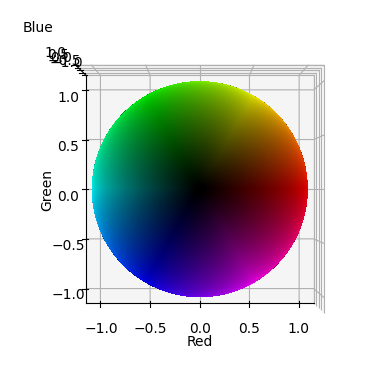

In [15]:
class RGBMapping3D:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # RGB 값에 해당하는 좌표를 점으로 플로팅
        points = np.array([point[0] for point in self.color_list])
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(90,270)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

rgb_mapping_3d = RGBMapping3D(color_index[:], color_list[:])

# 좌표를 플로팅
rgb_mapping_3d.plot_points()

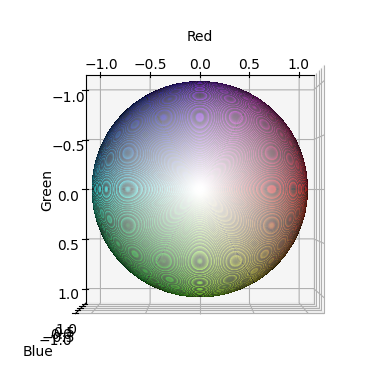

In [17]:
class RGBMapping3D:
    def __init__(self, color_index, color_list):
        self.color_index = np.array(color_index)
        self.color_list = np.array(color_list)

    def plot_points(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # RGB 값에 해당하는 좌표를 점으로 플로팅
        points = np.array([point[0] for point in self.color_list])
        colors = self.color_index / 255

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, marker='o')
        ax.view_init(270,90)
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()

rgb_mapping_3d = RGBMapping3D(color_index[:], color_list[:])

# 좌표를 플로팅
rgb_mapping_3d.plot_points()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class RGBMapping3D:
    def __init__(self, color_index, color_list):
        self.color_index = color_index
        self.color_list = color_list

    def plot_points(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # RGB 값에 해당하는 좌표를 점으로 플로팅
        for index, point in zip(self.color_index, self.color_list):
            ax.scatter(point[0][0], point[0][1], point[0][2], c=np.array(index) / 255, marker='o')

        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

        plt.show()


# RGBMapping3D 클래스 인스턴스 생성
rgb_mapping_3d = RGBMapping3D(color_index, color_list)

# 좌표를 플로팅
rgb_mapping_3d.plot_points()


C:\Users\HCI\AppData\Local\Temp\ipykernel_15912\1568839712.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(point[0][0], point[0][1], point[0][2], c=np.array(index) / 255, marker='o')
